## Merge file 

In [1]:
import csv
import pandas as pd 

# Generate filenames programmatically
path = "/Volumes/Kingston XS2000 Media/XGBoost_OD_TBBE/XGBoostTBBE/XGB1StatTest/"
files = [path + "1000_new_final_balance_{}.csv".format(i) for i in range(100)]

merged_filename = "1000stat_merge_result.csv"

with open(merged_filename, 'w', newline='') as outfile:
    writer = csv.writer(outfile)
    
    for index, filename in enumerate(files):
        with open(filename, 'r') as infile:
            reader = csv.reader(infile)
            
            # Skip header only if it's not the first file
            if index != 0:
                next(reader, None)
                
            # Write rows from current file to the output file
            writer.writerows(reader)

## Find average of each betting agents. 

In [2]:
import pandas as pd

# Read the data
df = pd.read_csv("1000stat_merge_result.csv", header=None)

# Drop the header row
df = df.drop(0)

# Convert all values to float
df = df.astype(float)

# Define ranges for mapping => to group agents with same type/category
ranges = [ 
    (0, 10, 1),
    (10, 20, 2),
    (20, 30, 3),
    (30, 40, 4),
    (40, 50, 5),
    (50, 55, 6),
    (55, 60, 7)
]

# Create a mapping function based on ranges
def get_mapping(col):
    for start, end, category in ranges:
        if start <= col < end:
            return category

# Create a new DataFrame with mapped columns
mapped_df = df.copy()
mapped_df.columns = [get_mapping(col) for col in df.columns]

# Group by column categories and compute the mean
averaged_df = mapped_df.groupby(mapped_df.columns, axis=1).mean()
averaged_df = averaged_df - 100000000

print(averaged_df)


              1            2          3           4          5            6  \
1   -410.688386  -348.215876 -15.382981 -183.350000  10.013051  1398.072748   
2   -180.019936   -54.111394 -13.500000 -151.950000  33.805212   540.784512   
3    927.770799 -3462.000000  10.500000 -307.500000   0.000000  5676.352262   
4   -243.045862 -1033.340774   3.105423  -71.311847   0.000000  1038.933982   
5    -49.415371   628.373973 -22.342164 -127.849296  26.487002  -454.609777   
..          ...          ...        ...         ...        ...          ...   
96    11.731761    81.732437  52.452933 -258.879161  67.877737   553.461365   
97    46.861290  -153.635922 -83.175592 -237.216240  -0.506727   108.658563   
98  -384.471977   387.321909 -24.993027 -211.534273  18.391368   535.096901   
99  -485.196770   306.841911 -17.336510 -141.335964   3.900000   497.146066   
100 -169.500000  -853.500000  15.000000 -184.500000  -3.000000   684.000000   

               7  
1     497.175637  
2     190.767

/var/folders/56/1wgtsx053h5_2lvs_fqprbsw0000gn/T/ipykernel_68470/3462472306.py:34: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  averaged_df = mapped_df.groupby(mapped_df.columns, axis=1).mean()


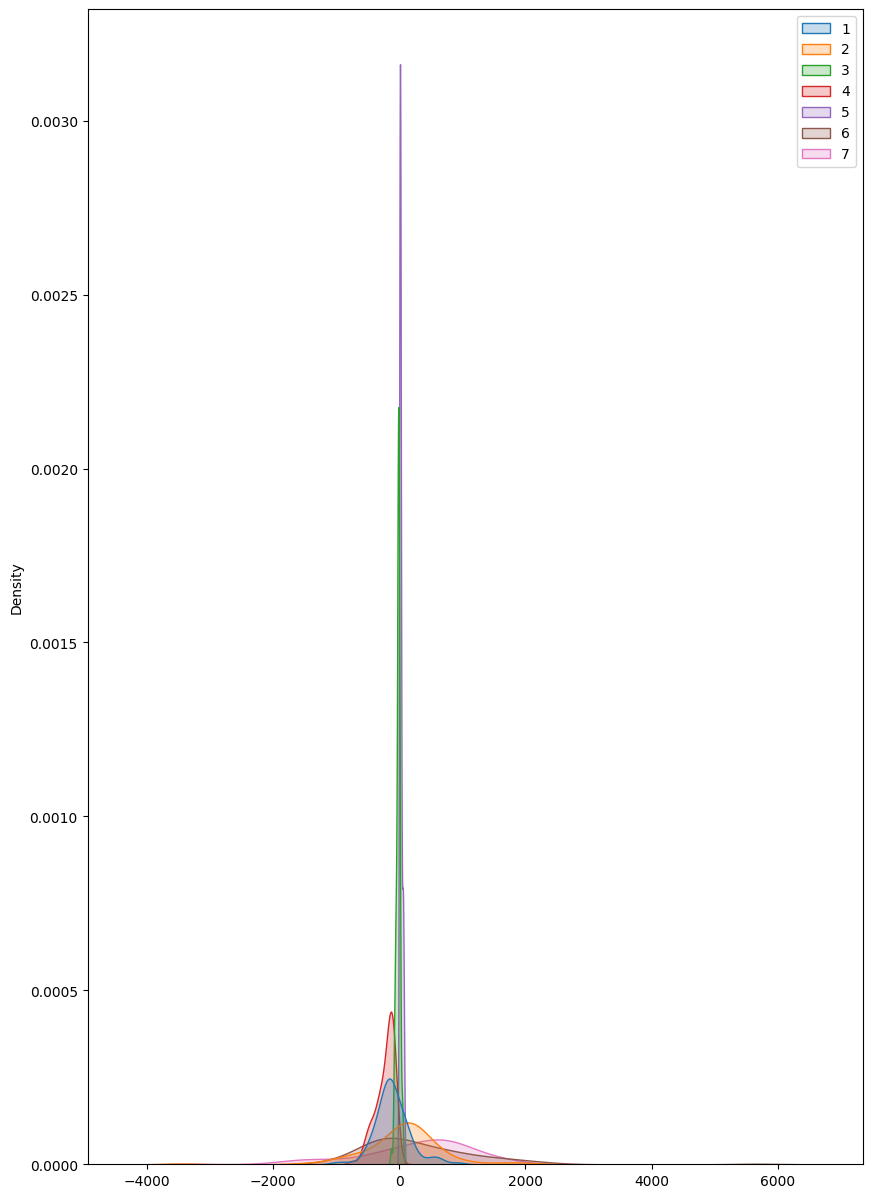

In [3]:
import seaborn as sns 
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 15))
distributionPlot = sns.kdeplot(data=averaged_df,fill=True)
plt.show()


## Statistical Testing

In [4]:
from scipy import stats
xgboost_avg_balance = averaged_df.iloc[:, 6]  # XGBoost column

# Loop through columns 1-6 for other agents
for col_index in range(6):
    other_agent_balance = averaged_df.iloc[:, col_index]
    # Check normality for both columns
    _, pvalue_xgboost = stats.shapiro(xgboost_avg_balance)
    _, pvalue_other_agent = stats.shapiro(other_agent_balance)
    print("P_value_xgboost",pvalue_xgboost)
    print("pvalue_other_agent ",pvalue_other_agent)
    # If both are normally distributed
    if pvalue_xgboost > 0.05 and pvalue_other_agent > 0.05:
        
        print("normal")
        statistic, pvalue = stats.ttest_ind(xgboost_avg_balance, other_agent_balance)
        if pvalue < 0.05:
            print("There is a statistically significant difference")
        else:
            print("There isn't a statistically significant difference")
    else:
        print("not normal")
        # If either or both are not normally distributed
        statistic, pvalue = stats.mannwhitneyu(xgboost_avg_balance, other_agent_balance)
        if pvalue < 0.05:
            print("There is a statistically significant difference")
            print("P-Value", pvalue)
            print("")
        else:
            print("There isn't a statistically significant difference")


P_value_xgboost 7.287468051570946e-05
pvalue_other_agent  0.00019338873578933765
not normal
There is a statistically significant difference
P-Value 1.26510345841388e-07

P_value_xgboost 7.287468051570946e-05
pvalue_other_agent  6.279299993040055e-08
not normal
There is a statistically significant difference
P-Value 0.0018914415449272836

P_value_xgboost 7.287468051570946e-05
pvalue_other_agent  0.009373036757237956
not normal
There is a statistically significant difference
P-Value 2.148124024664048e-06

P_value_xgboost 7.287468051570946e-05
pvalue_other_agent  6.535895289585862e-06
not normal
There is a statistically significant difference
P-Value 1.6780556443598476e-10

P_value_xgboost 7.287468051570946e-05
pvalue_other_agent  8.995530747108347e-07
not normal
There is a statistically significant difference
P-Value 3.5041489369618815e-05

P_value_xgboost 7.287468051570946e-05
pvalue_other_agent  3.6110688779179798e-09
not normal
There isn't a statistically significant difference


# Stat test with plotting

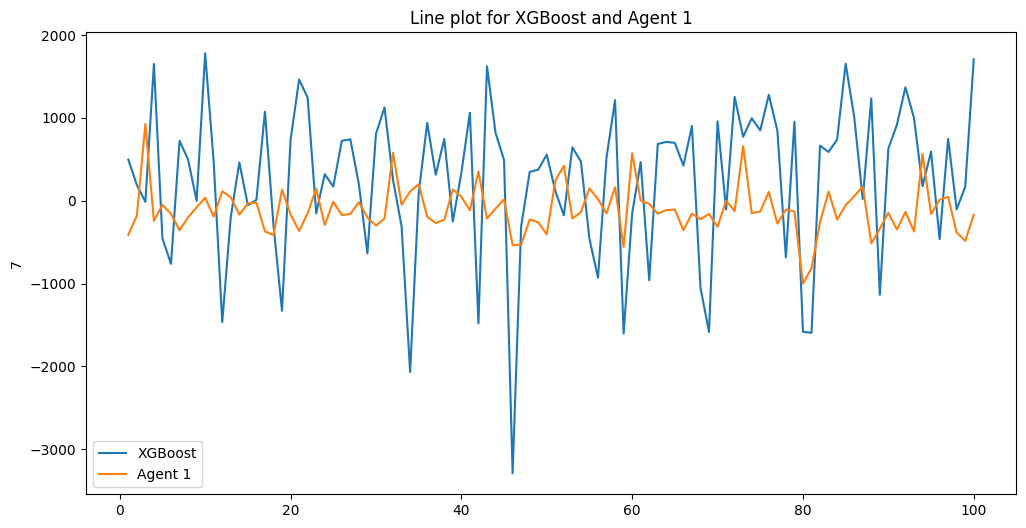

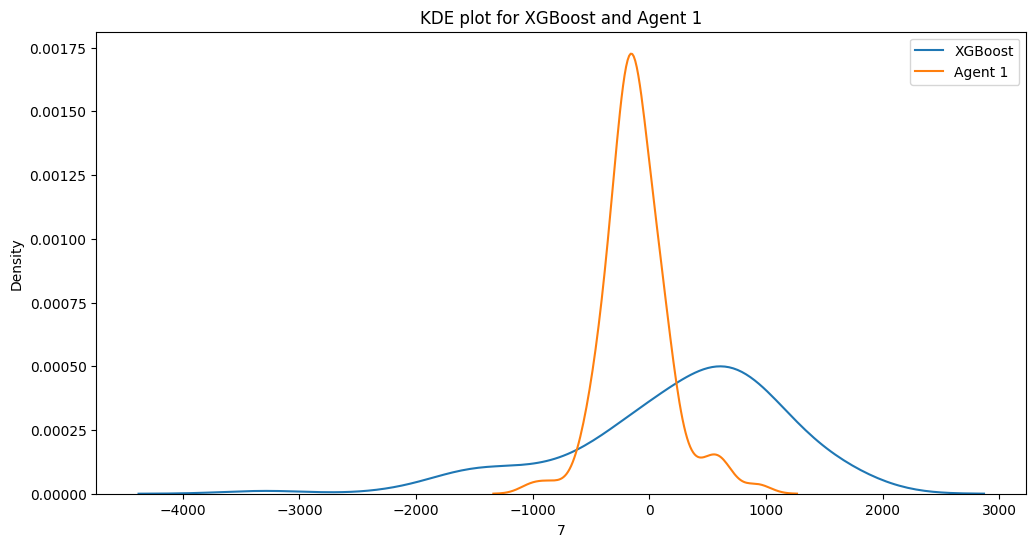

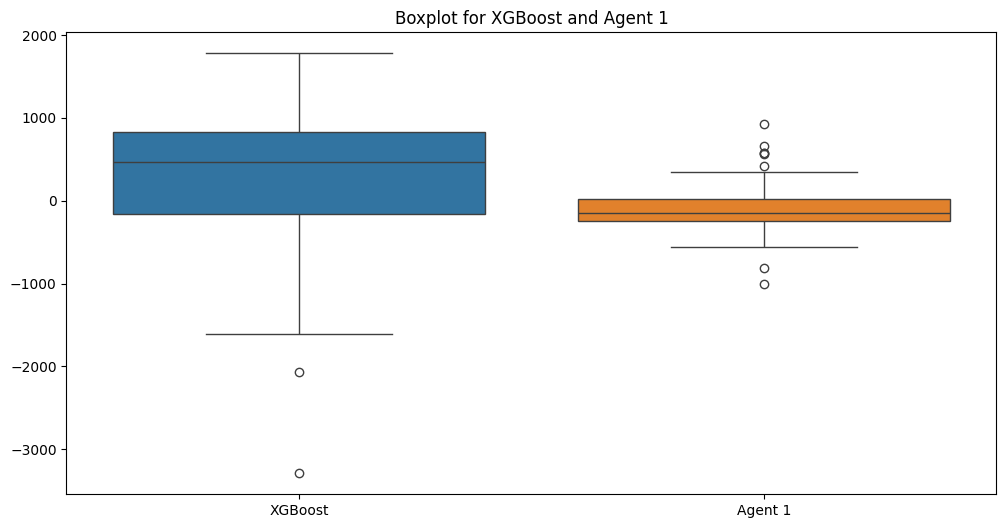

P_value_xgboost 7.287468051570946e-05
pvalue_other_agent  0.00019338873578933765
not normal
There is a statistically significant difference
P-Value 1.26510345841388e-07



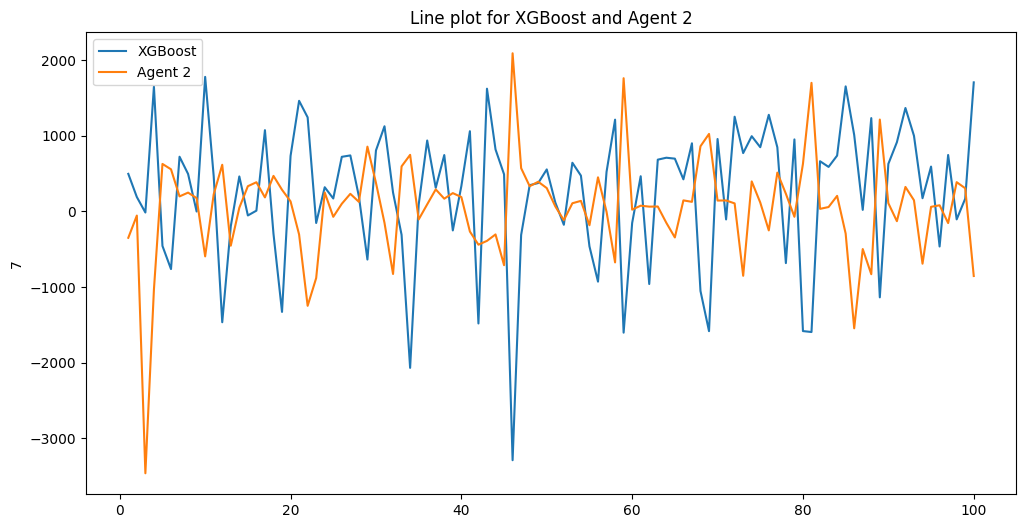

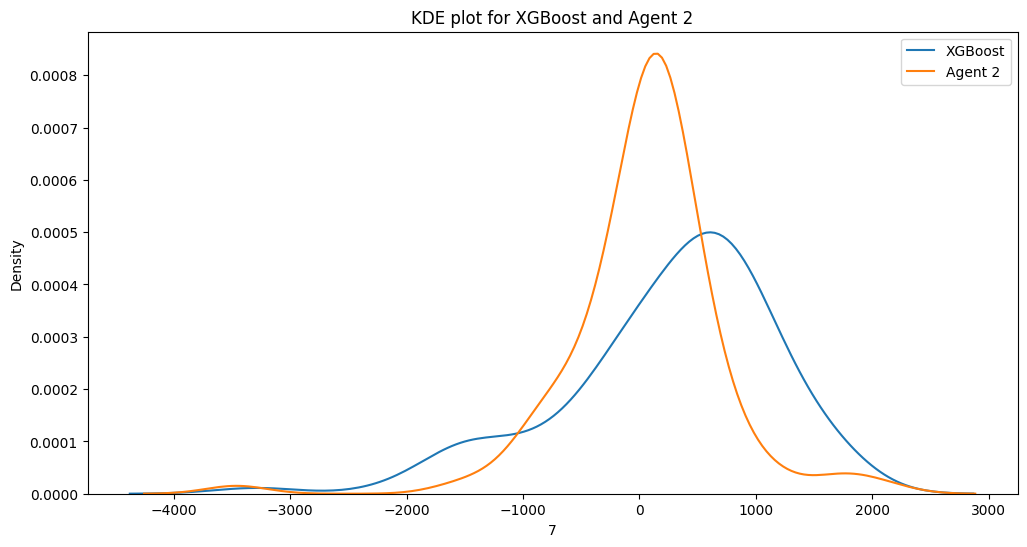

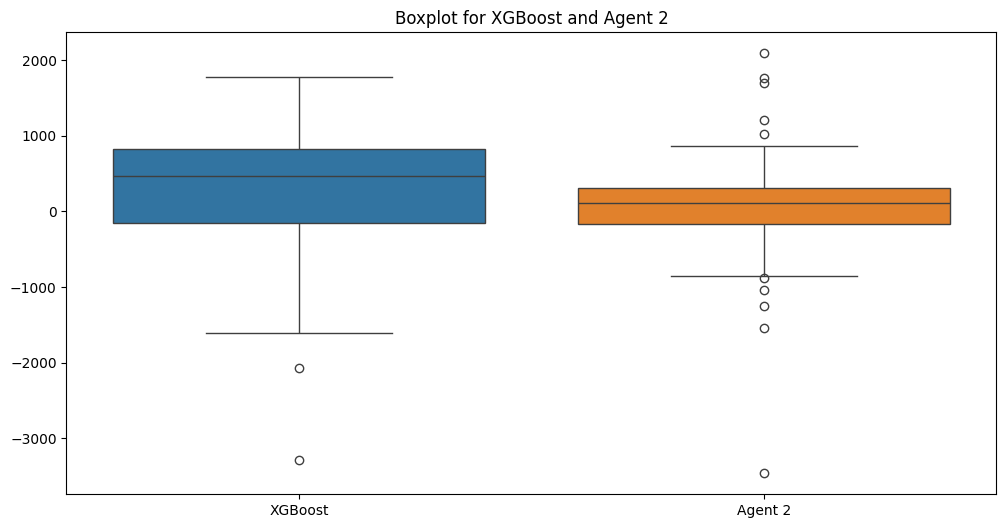

P_value_xgboost 7.287468051570946e-05
pvalue_other_agent  6.279299993040055e-08
not normal
There is a statistically significant difference
P-Value 0.0018914415449272836



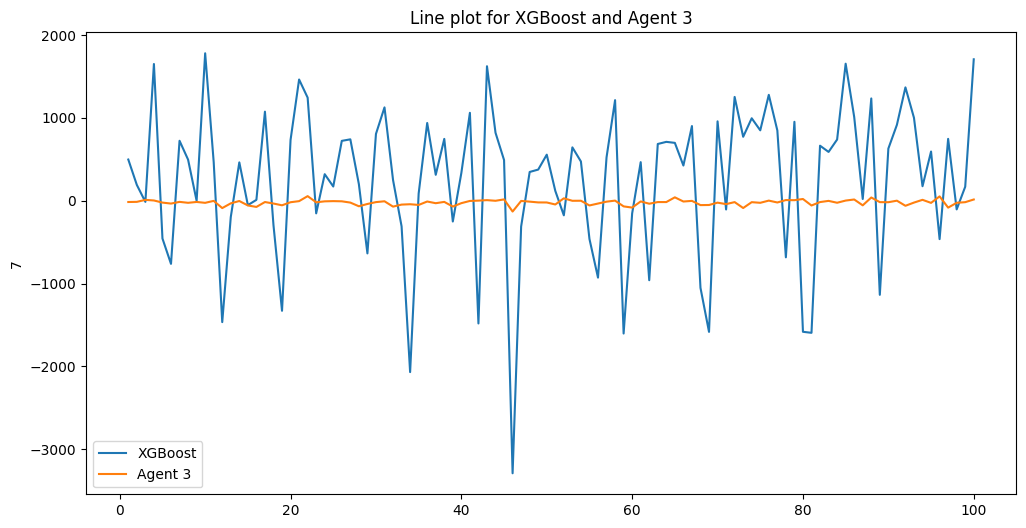

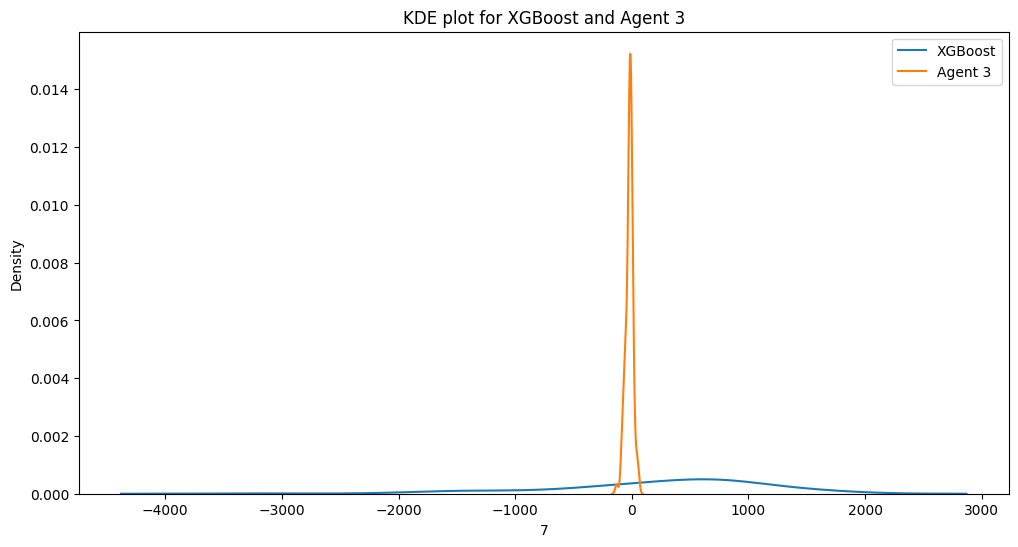

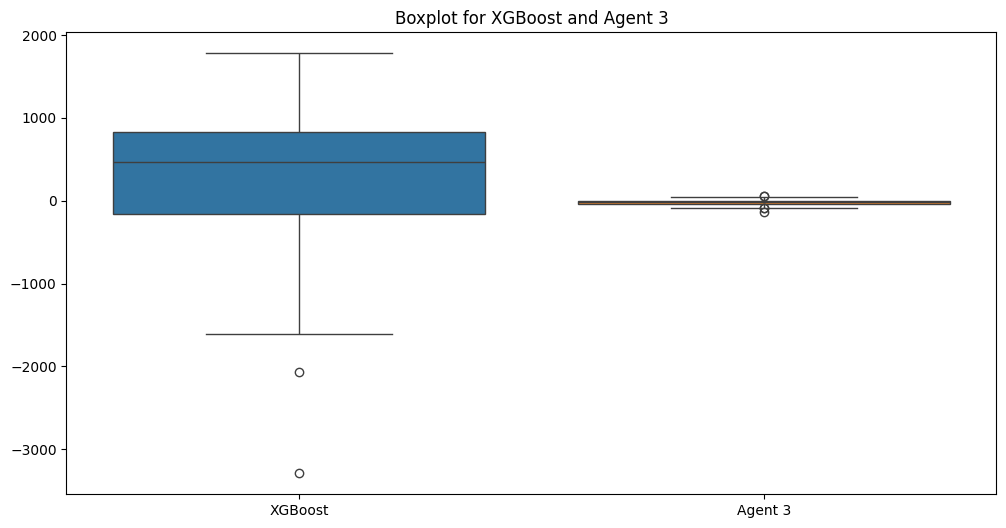

P_value_xgboost 7.287468051570946e-05
pvalue_other_agent  0.009373036757237956
not normal
There is a statistically significant difference
P-Value 2.148124024664048e-06



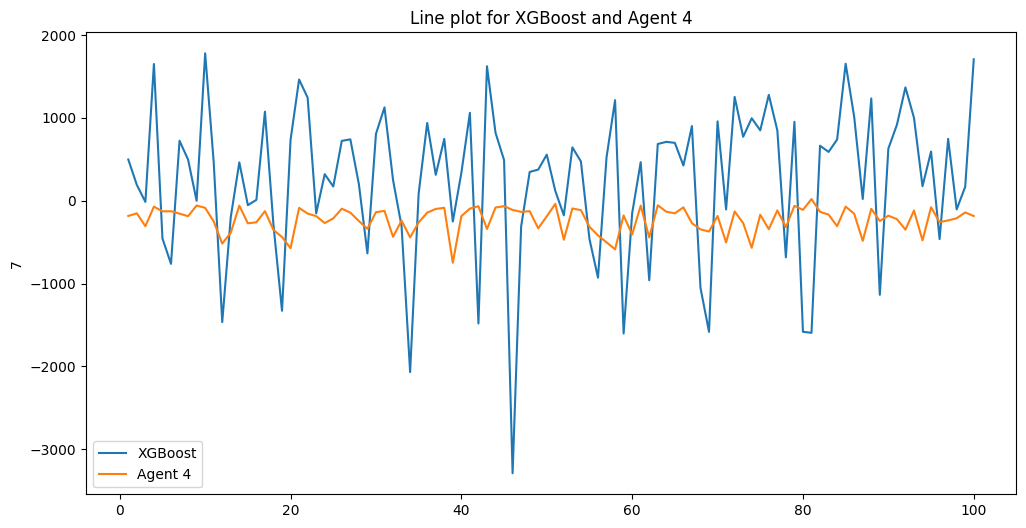

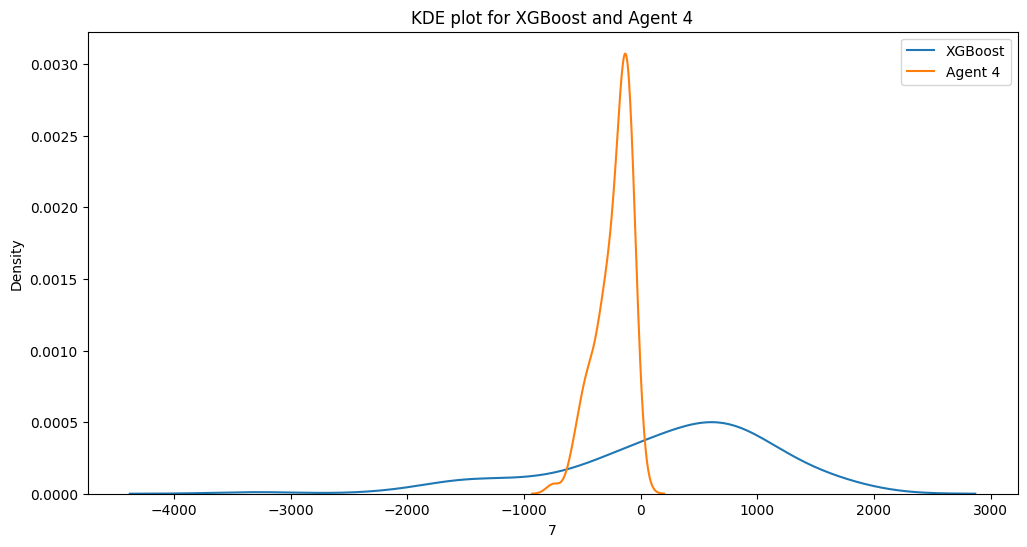

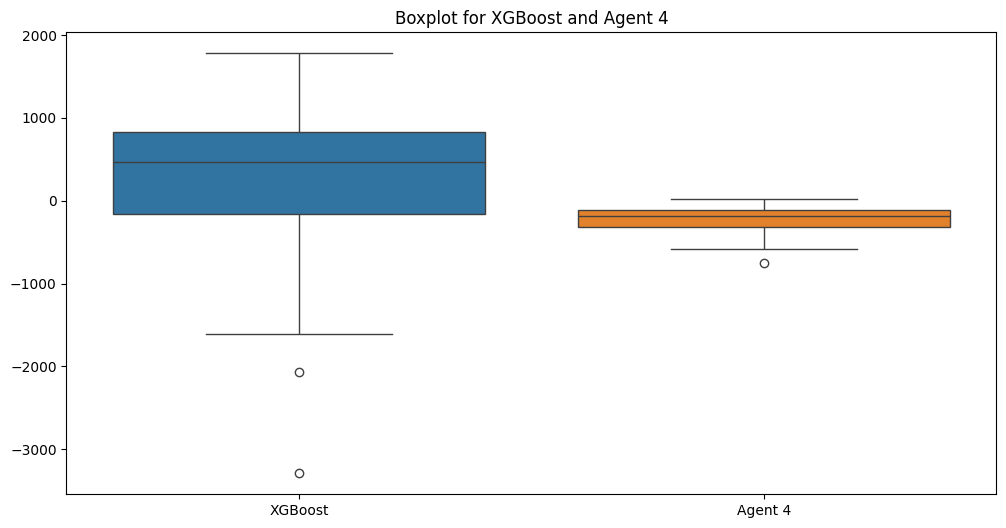

P_value_xgboost 7.287468051570946e-05
pvalue_other_agent  6.535895289585862e-06
not normal
There is a statistically significant difference
P-Value 1.6780556443598476e-10



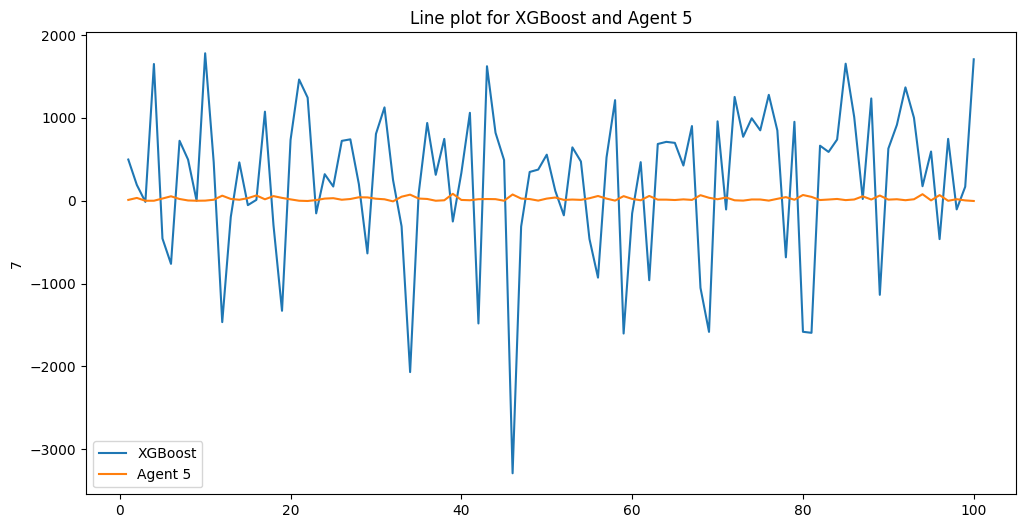

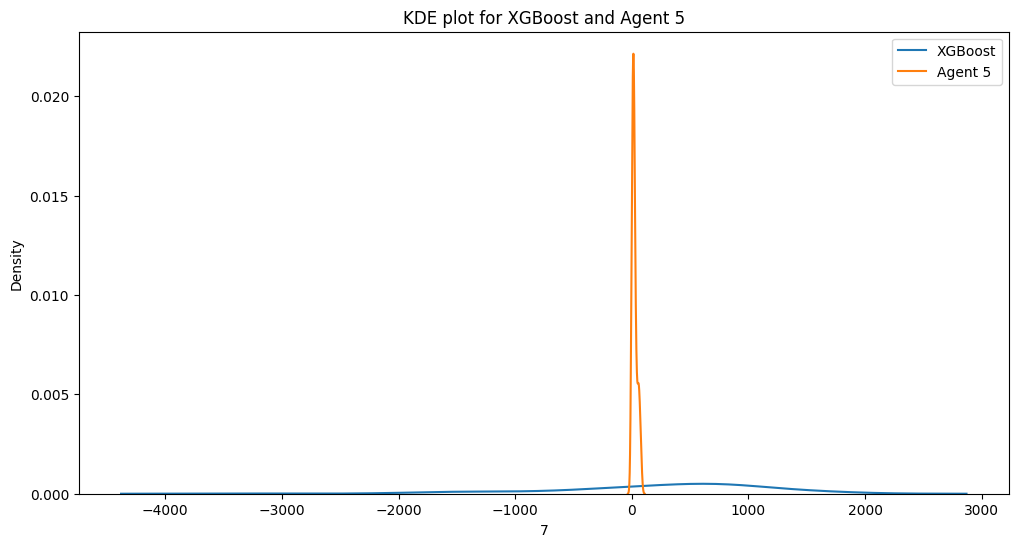

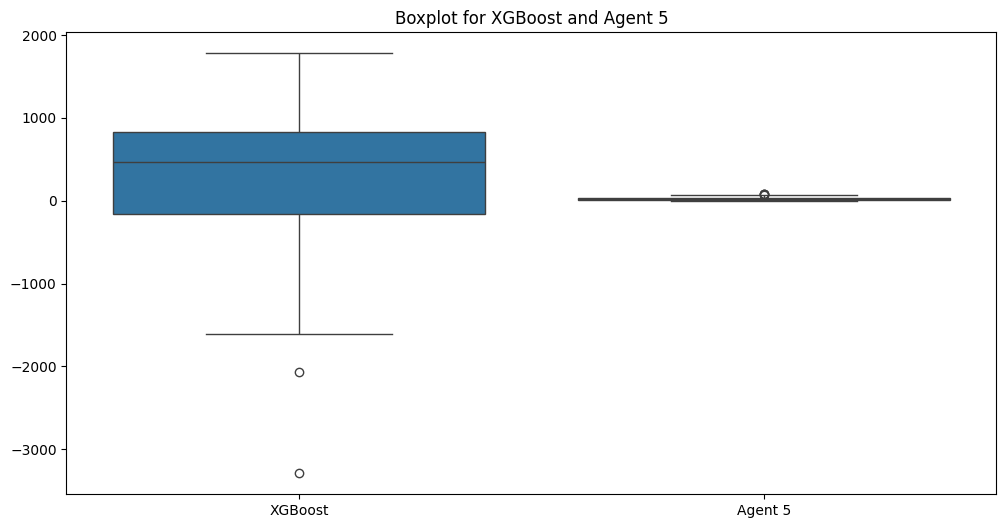

P_value_xgboost 7.287468051570946e-05
pvalue_other_agent  8.995530747108347e-07
not normal
There is a statistically significant difference
P-Value 3.5041489369618815e-05



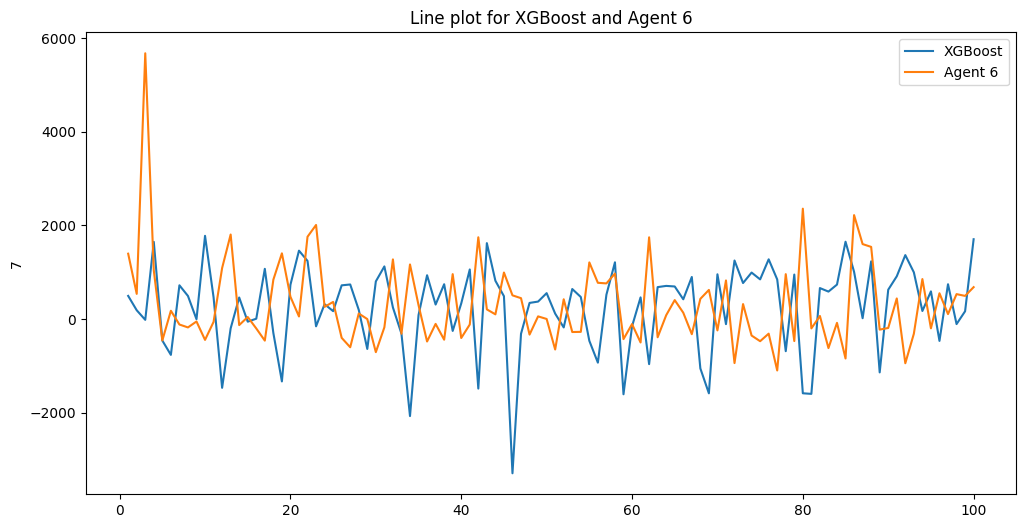

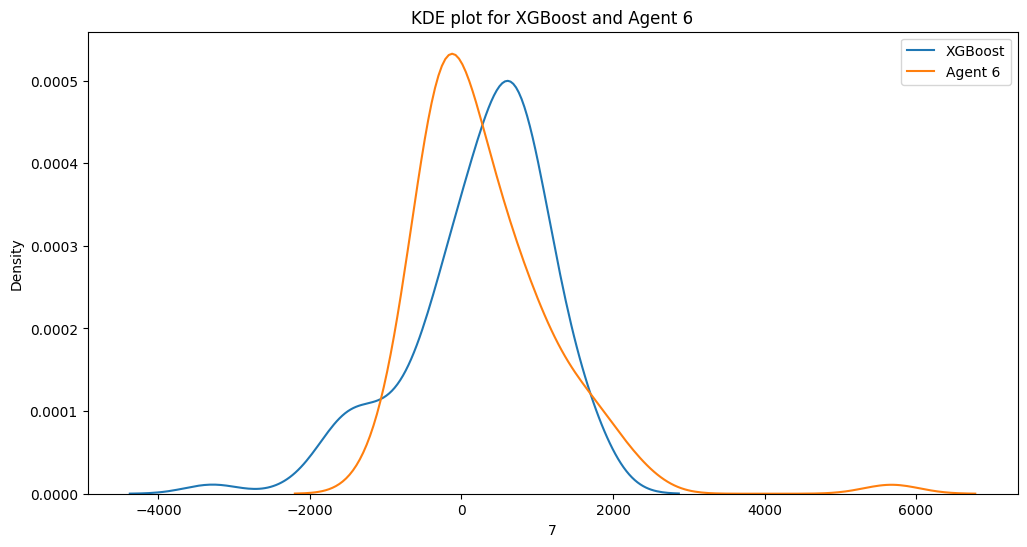

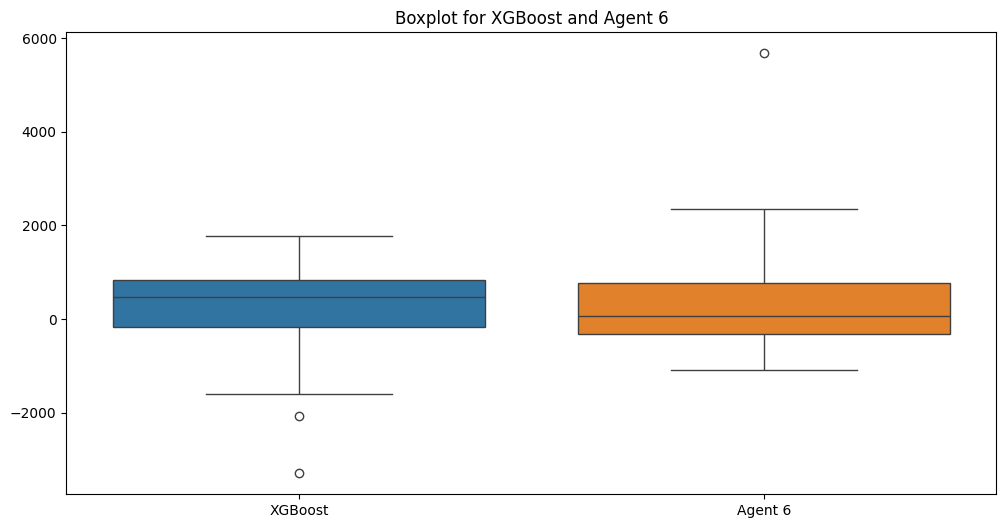

P_value_xgboost 7.287468051570946e-05
pvalue_other_agent  3.6110688779179798e-09
not normal
There isn't a statistically significant difference


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

xgboost_avg_balance = averaged_df.iloc[:, 6]  # XGBoost column

# Loop through columns 1-6 for other agents
for col_index in range(6):
    other_agent_balance = averaged_df.iloc[:, col_index]

    # Line plot for XGBoost and the other agent
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=xgboost_avg_balance, label='XGBoost')
    sns.lineplot(data=other_agent_balance, label='Agent ' + str(col_index+1))
    plt.title('Line plot for XGBoost and Agent ' + str(col_index+1))
    plt.legend()
    plt.show()

    # KDE plot for the distributions
    plt.figure(figsize=(12, 6))
    sns.kdeplot(xgboost_avg_balance, label='XGBoost')
    sns.kdeplot(other_agent_balance, label='Agent ' + str(col_index+1))
    plt.title('KDE plot for XGBoost and Agent ' + str(col_index+1))
    plt.legend()
    plt.show()

    # Boxplot for the two distributions
    combined_data = pd.concat([xgboost_avg_balance.rename('XGBoost'), 
                               other_agent_balance.rename('Agent ' + str(col_index+1))], axis=1)
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=combined_data)
    plt.title('Boxplot for XGBoost and Agent ' + str(col_index+1))
    plt.show()

    # Check normality for both columns
    _, pvalue_xgboost = stats.shapiro(xgboost_avg_balance)
    _, pvalue_other_agent = stats.shapiro(other_agent_balance)
    print("P_value_xgboost", pvalue_xgboost)
    print("pvalue_other_agent ", pvalue_other_agent)

    # If both are normally distributed
    if pvalue_xgboost > 0.05 and pvalue_other_agent > 0.05:
        print("normal")
        statistic, pvalue = stats.ttest_ind(xgboost_avg_balance, other_agent_balance)
        if pvalue < 0.05:
            print("There is a statistically significant difference")
        else:
            print("There isn't a statistically significant difference")
    else:
        print("not normal")
        # If either or both are not normally distributed
        statistic, pvalue = stats.mannwhitneyu(xgboost_avg_balance, other_agent_balance)
        if pvalue < 0.05:
            print("There is a statistically significant difference")
            print("P-Value", pvalue)
            print("")
        else:
            print("There isn't a statistically significant difference")


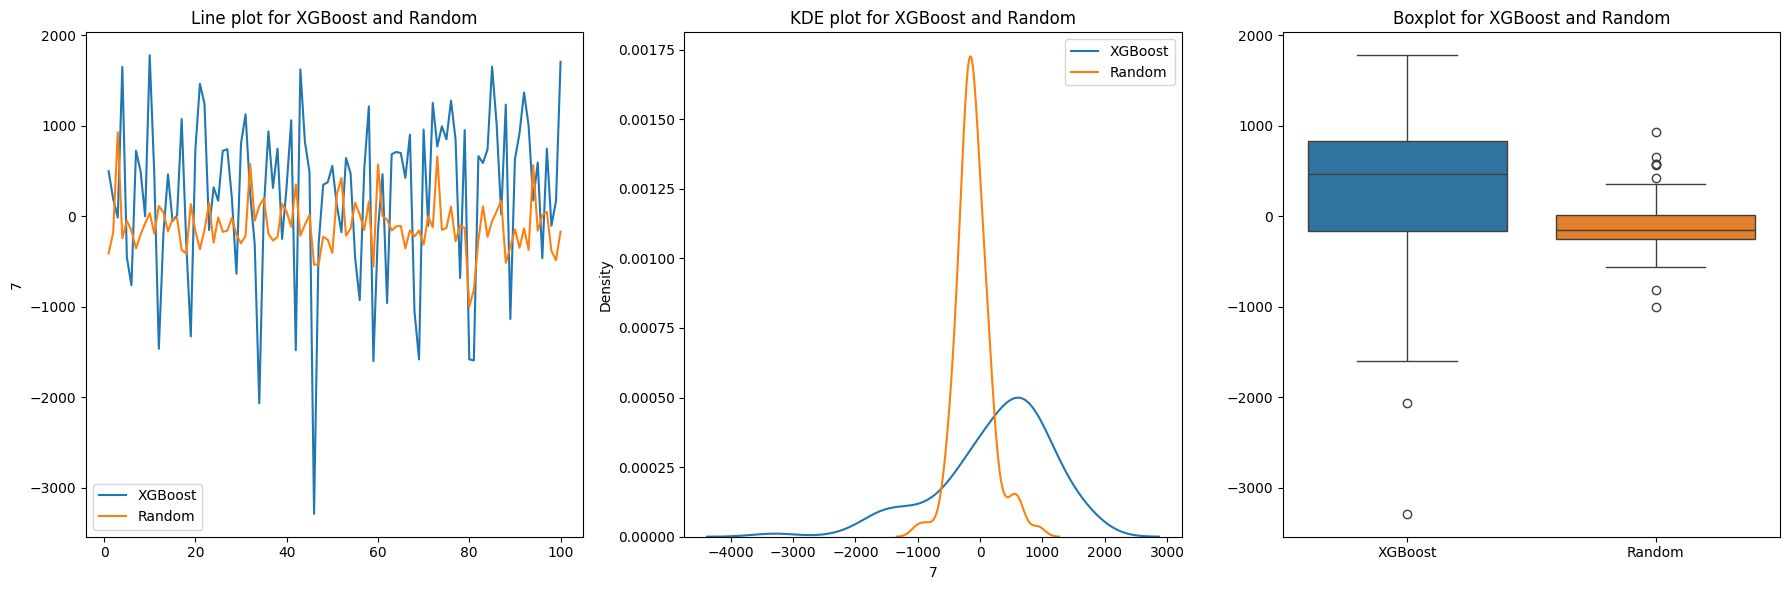

P_value_xgboost 7.287468051570946e-05
P_value_Random 0.00019338873578933765
not normal
There is a statistically significant difference
P-Value 1.26510345841388e-07



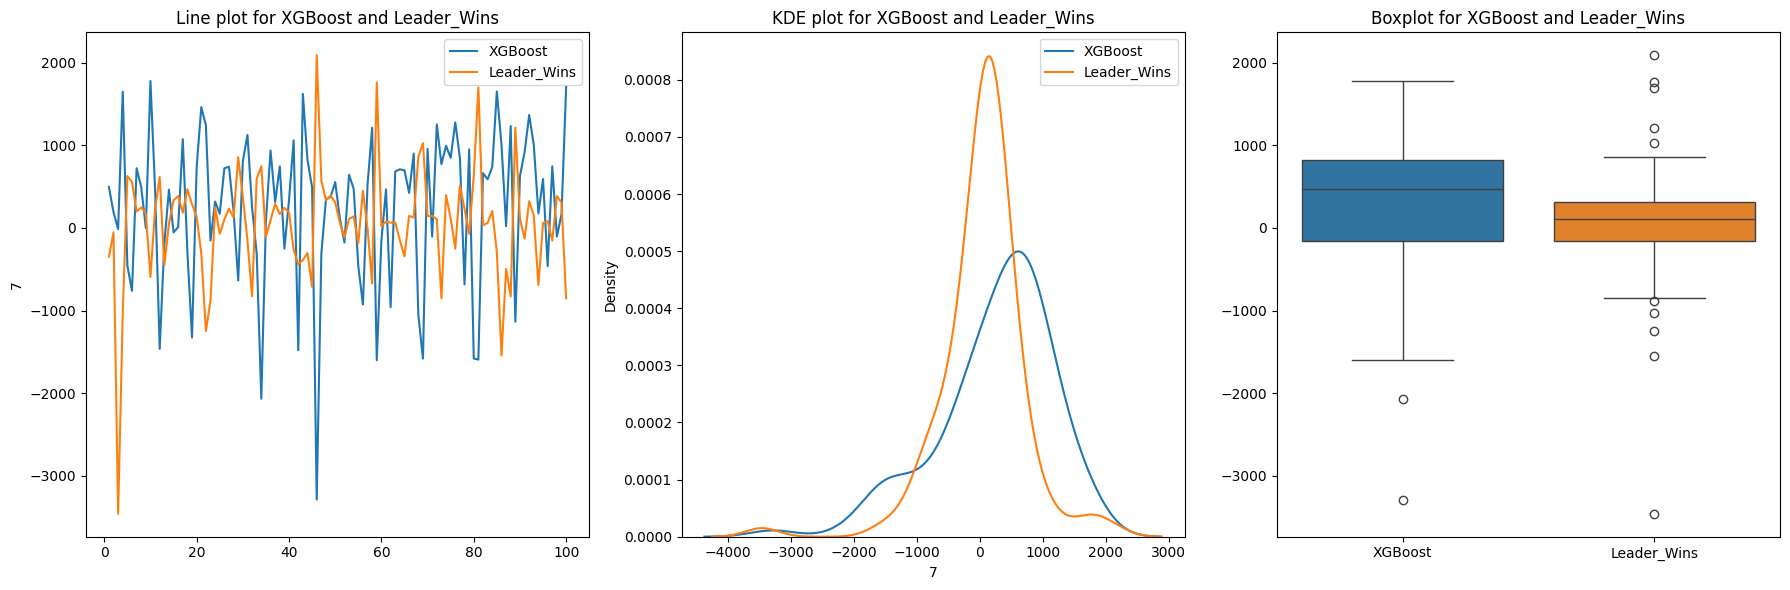

P_value_xgboost 7.287468051570946e-05
P_value_Leader_Wins 6.279299993040055e-08
not normal
There is a statistically significant difference
P-Value 0.0018914415449272836



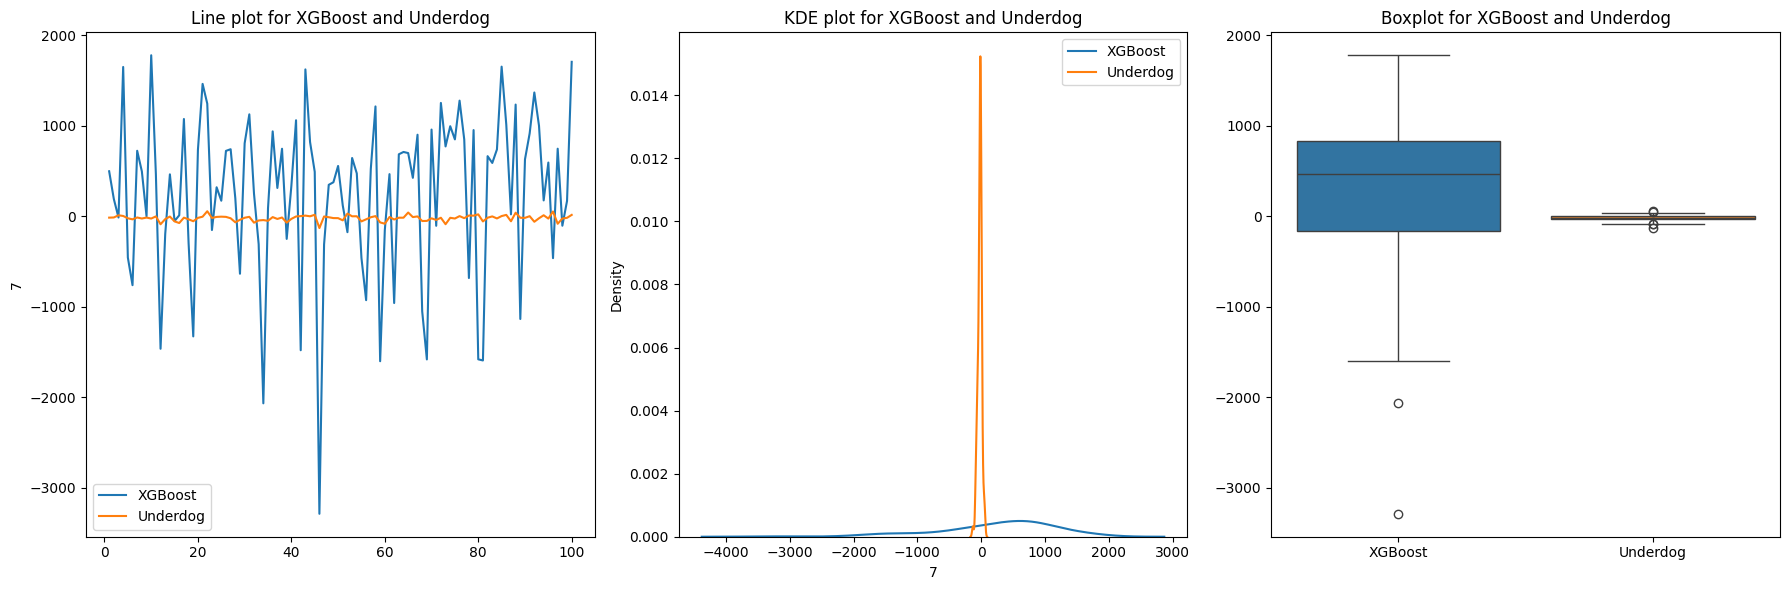

P_value_xgboost 7.287468051570946e-05
P_value_Underdog 0.009373036757237956
not normal
There is a statistically significant difference
P-Value 2.148124024664048e-06



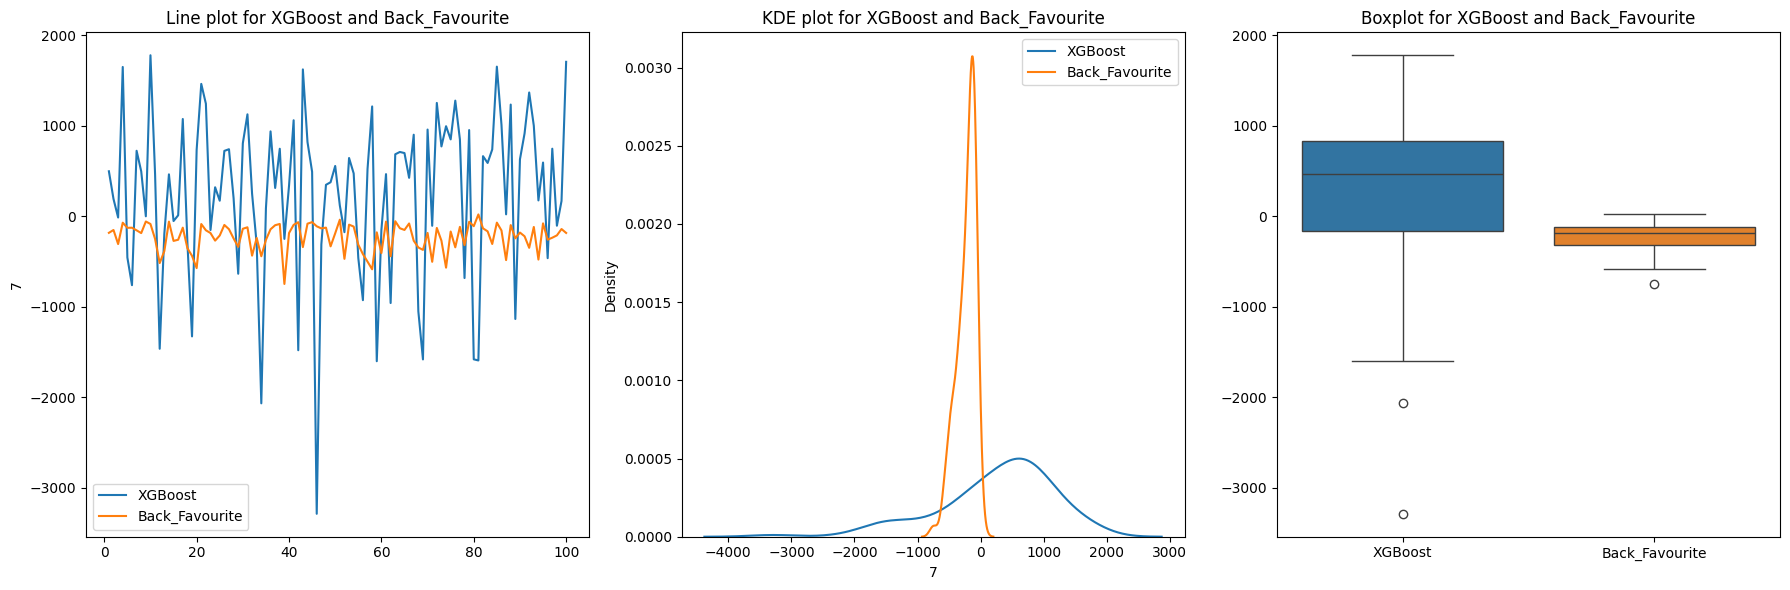

P_value_xgboost 7.287468051570946e-05
P_value_Back_Favourite 6.535895289585862e-06
not normal
There is a statistically significant difference
P-Value 1.6780556443598476e-10



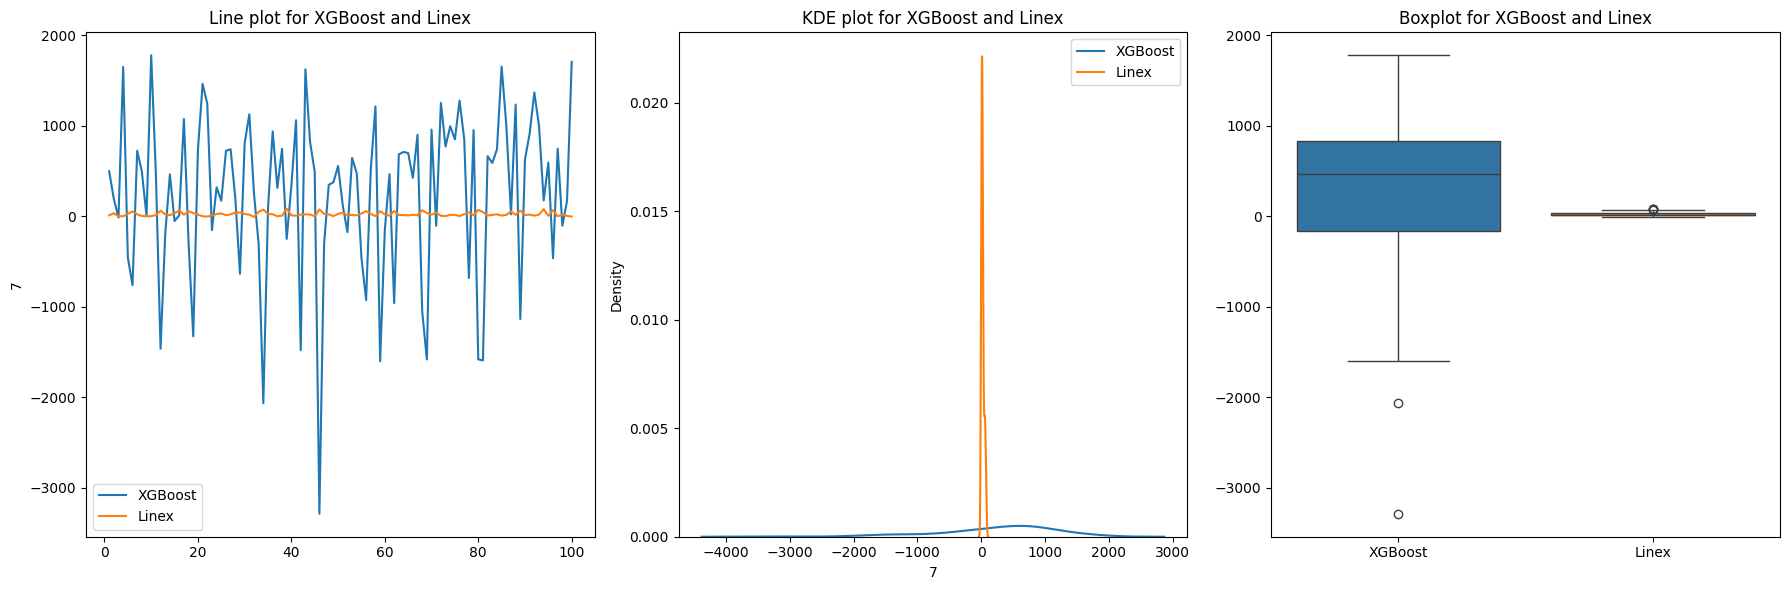

P_value_xgboost 7.287468051570946e-05
P_value_Linex 8.995530747108347e-07
not normal
There is a statistically significant difference
P-Value 3.5041489369618815e-05



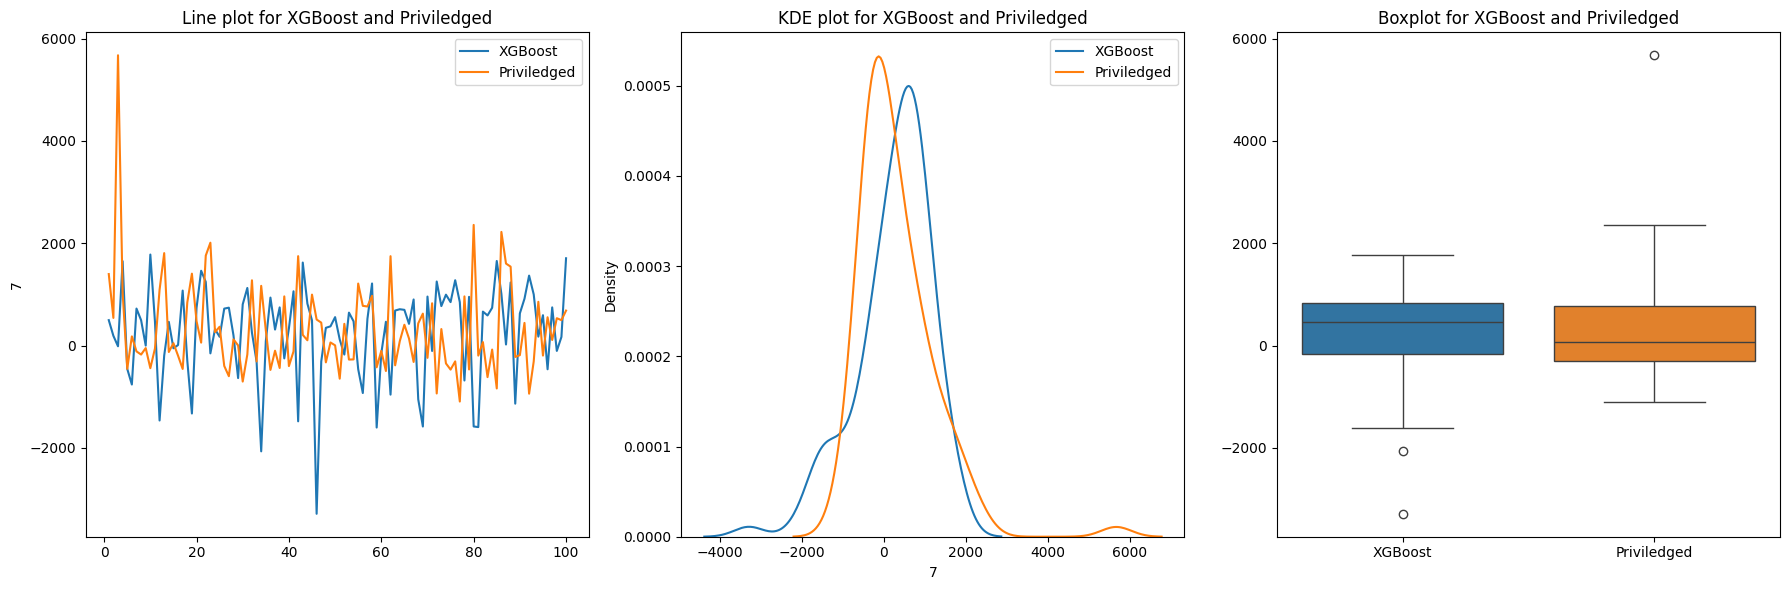

P_value_xgboost 7.287468051570946e-05
P_value_Priviledged 3.6110688779179798e-09
not normal
There isn't a statistically significant difference


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

xgboost_avg_balance = averaged_df.iloc[:, 6]  # XGBoost column

# Define agent names for easier access and readability
agent_names = ["Random", "Leader_Wins", "Underdog", "Back_Favourite", "Linex", "Priviledged"]

# Loop through columns 1-6 for other agents
for col_index in range(6):
    other_agent_balance = averaged_df.iloc[:, col_index]
    agent_name = agent_names[col_index]

    # Group the plots horizontally
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))

    # Line plot for XGBoost and the other agent
    sns.lineplot(data=xgboost_avg_balance, ax=axes[0], label='XGBoost')
    sns.lineplot(data=other_agent_balance, ax=axes[0], label=agent_name)
    axes[0].set_title(f'Line plot for XGBoost and {agent_name}')
    axes[0].legend()

    # KDE plot for the distributions
    sns.kdeplot(xgboost_avg_balance, ax=axes[1], label='XGBoost')
    sns.kdeplot(other_agent_balance, ax=axes[1], label=agent_name)
    axes[1].set_title(f'KDE plot for XGBoost and {agent_name}')
    axes[1].legend()

    # Boxplot for the two distributions
    combined_data = pd.concat([xgboost_avg_balance.rename('XGBoost'), 
                               other_agent_balance.rename(agent_name)], axis=1)
    sns.boxplot(data=combined_data, ax=axes[2])
    axes[2].set_title(f'Boxplot for XGBoost and {agent_name}')
    
    plt.tight_layout()
    plt.show()

    # Check normality for both columns
    _, pvalue_xgboost = stats.shapiro(xgboost_avg_balance)
    _, pvalue_other_agent = stats.shapiro(other_agent_balance)
    print("P_value_xgboost", pvalue_xgboost)
    print(f"P_value_{agent_name}", pvalue_other_agent)

    # If both are normally distributed
    if pvalue_xgboost > 0.05 and pvalue_other_agent > 0.05:
        print("normal")
        statistic, pvalue = stats.ttest_ind(xgboost_avg_balance, other_agent_balance)
        if pvalue < 0.05:
            print("There is a statistically significant difference")
        else:
            print("There isn't a statistically significant difference")
    else:
        print("not normal")
        # If either or both are not normally distributed
        statistic, pvalue = stats.mannwhitneyu(xgboost_avg_balance, other_agent_balance)
        if pvalue < 0.05:
            print("There is a statistically significant difference")
            print("P-Value", pvalue)
            print("")
        else:
            print("There isn't a statistically significant difference")


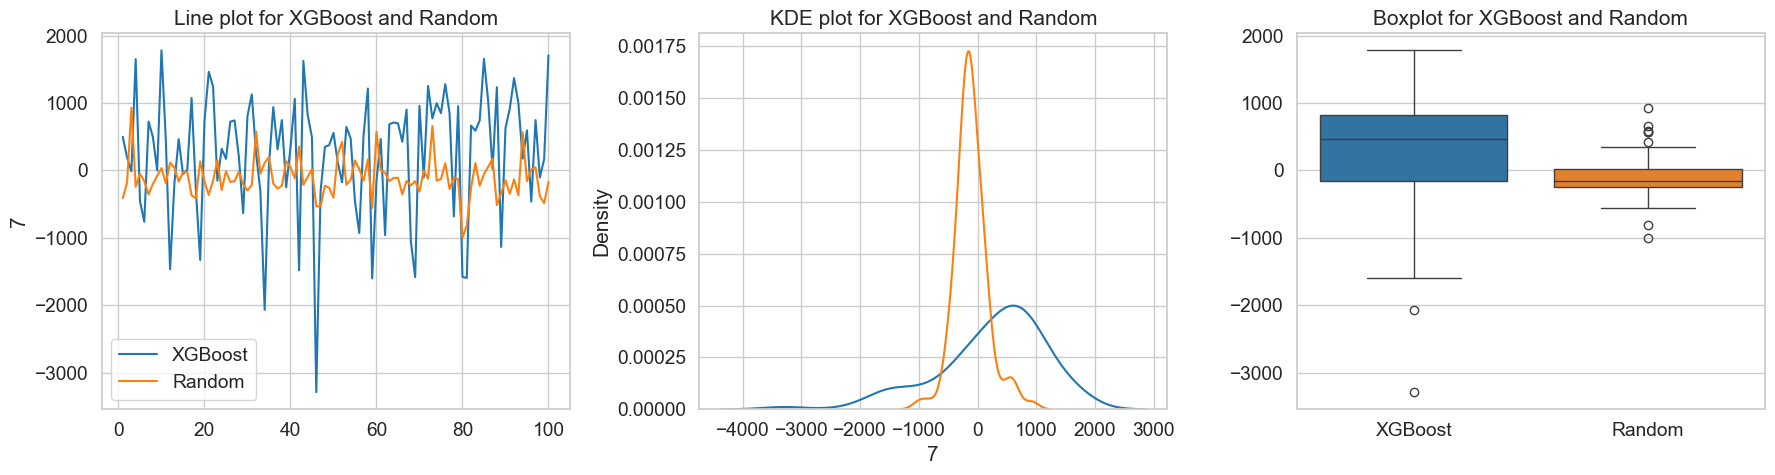

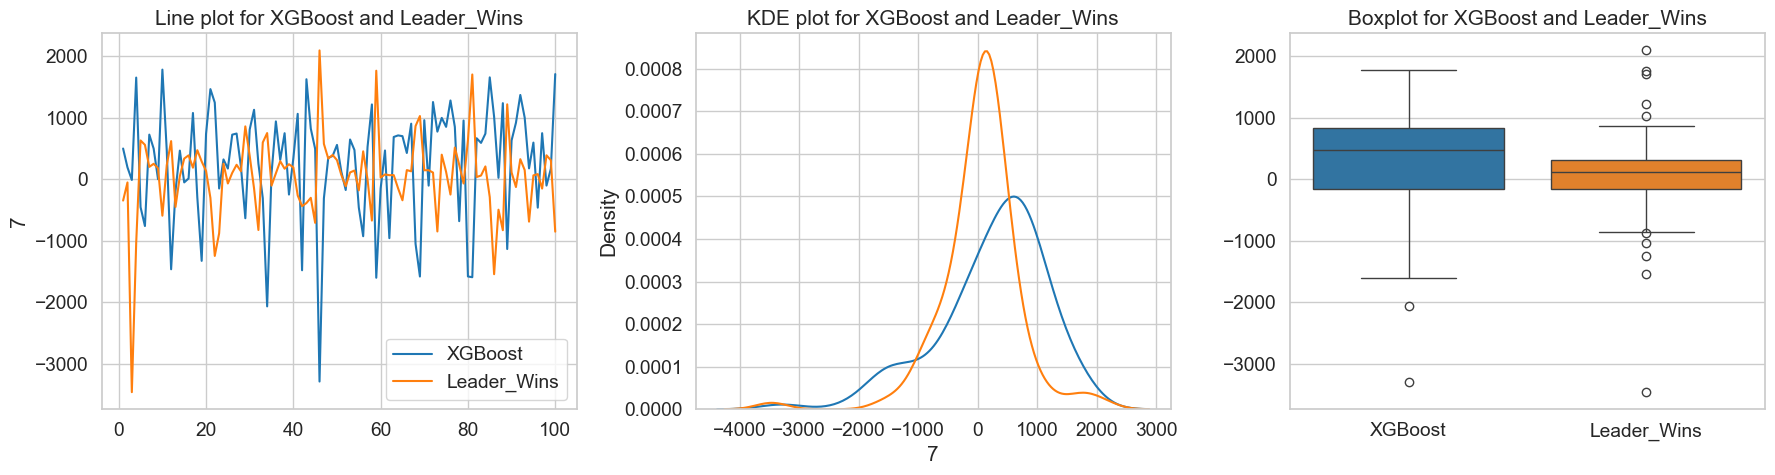

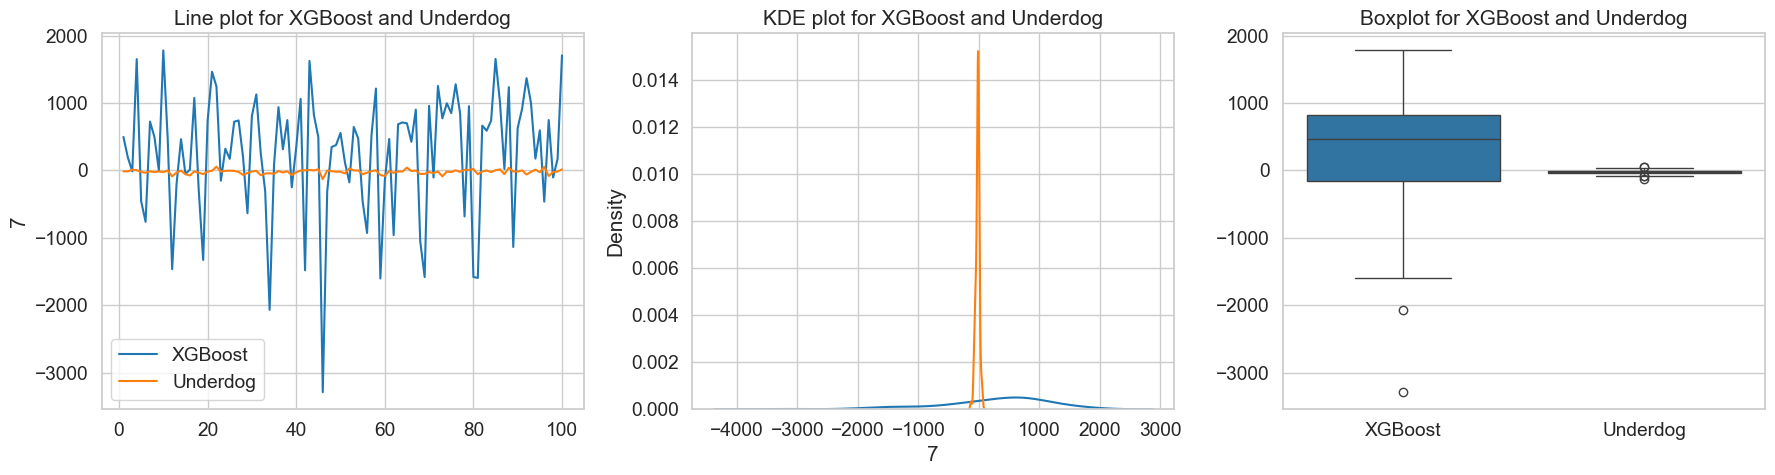

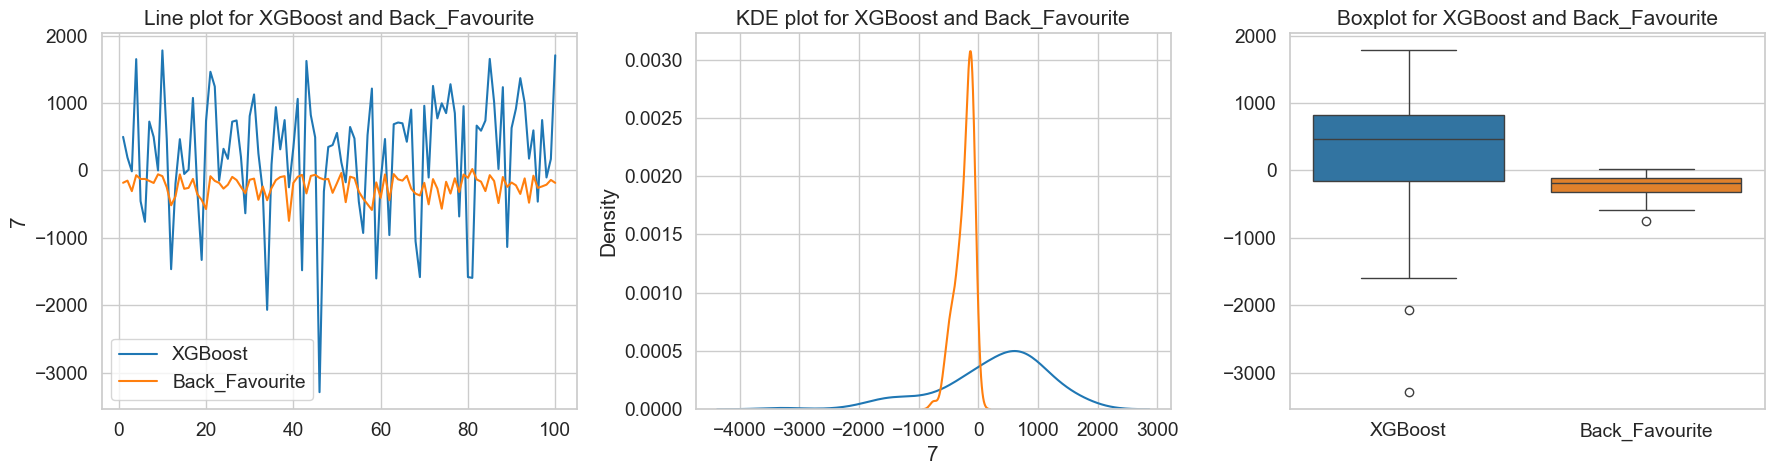

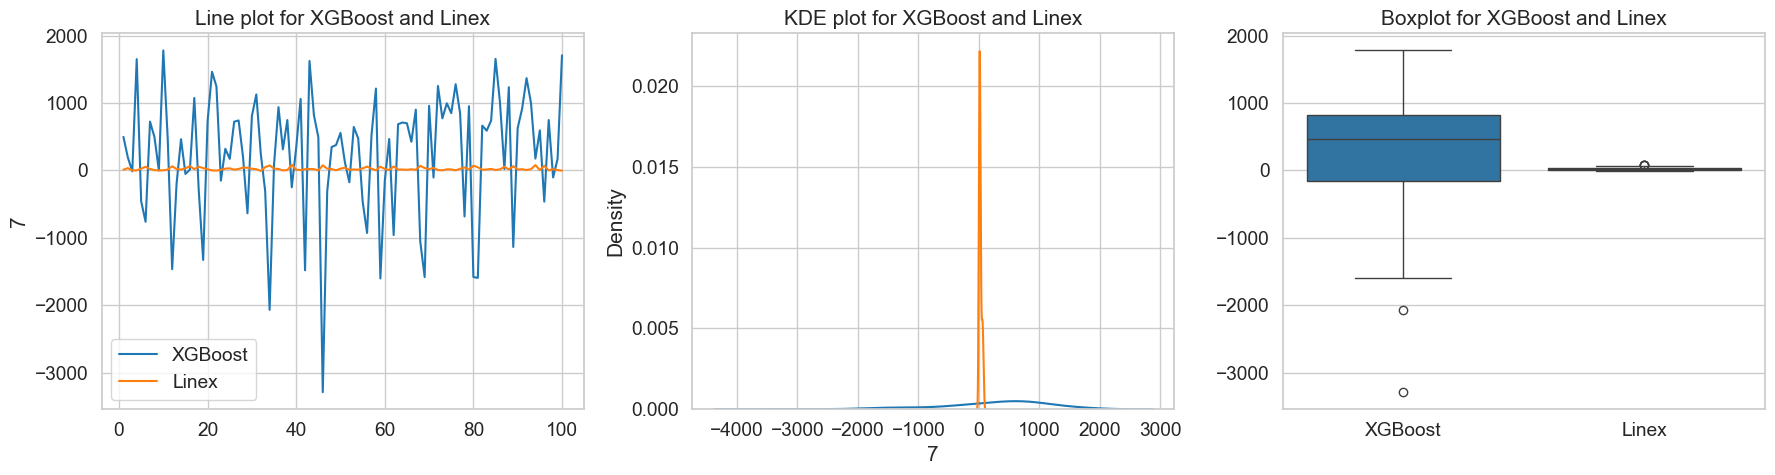

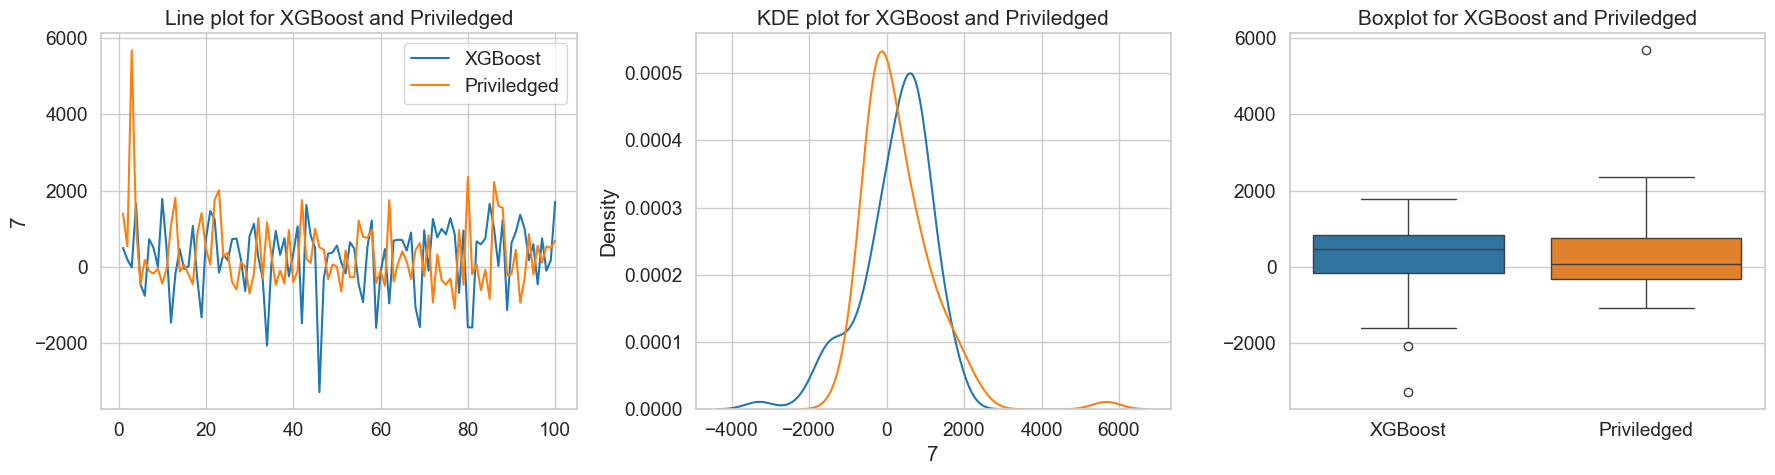

In [7]:
xgboost_avg_balance = averaged_df.iloc[:, 6]  # XGBoost column

# Define agent names for easier access and readability
agent_names = ["Random", "Leader_Wins", "Underdog", "Back_Favourite", "Linex", "Priviledged"]

# Setting style and text scale for seaborn plots
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.25)  # Adjust the font_scale to increase text size

# Loop through columns 1-6 for other agents
for col_index in range(6):
    other_agent_balance = averaged_df.iloc[:, col_index]
    agent_name = agent_names[col_index]

    # Group the plots horizontally with modified height
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))  # Decreased the height from 6 to 5

    # Line plot for XGBoost and the other agent
    sns.lineplot(data=xgboost_avg_balance, ax=axes[0], label='XGBoost')
    sns.lineplot(data=other_agent_balance, ax=axes[0], label=agent_name)
    axes[0].set_title(f'Line plot for XGBoost and {agent_name}')

    # KDE plot for the distributions
    sns.kdeplot(xgboost_avg_balance, ax=axes[1], label='XGBoost')
    sns.kdeplot(other_agent_balance, ax=axes[1], label=agent_name)
    axes[1].set_title(f'KDE plot for XGBoost and {agent_name}')

    # Boxplot for the two distributions
    combined_data = pd.concat([xgboost_avg_balance.rename('XGBoost'), 
                               other_agent_balance.rename(agent_name)], axis=1)
    sns.boxplot(data=combined_data, ax=axes[2])
    axes[2].set_title(f'Boxplot for XGBoost and {agent_name}')
    
    plt.tight_layout()
    plt.show()